## LinearRegression 모델

In [1]:
# 관련 라이브러리 및 모듈 Import
# import
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비 및 분할

In [2]:
# 데이터 csv 불러오기
train = pd.read_csv('../data/train3.csv')

In [3]:
# Unnamed: 0 column제거
train = train.iloc[:,1:]
# 소수점 2자리까지
train.match = round(train.match, 2)

In [4]:
# X(독립변수), Y(종속변수) 분할
X = train.drop('match', axis=1)
y = train['match']
# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 모델 클래스 선택(LinearRegression)

In [5]:
lr = LinearRegression()

### 2.모델 구축 , 학습, 예측 수행

In [6]:
#  numpy 출력 옵션을 소수점 3자리로 고정하겠다는 설정값.
np.set_printoptions(precision =3 , suppress = True)

In [7]:
#학습 수행
lr.fit(X_train,y_train)
print(lr.intercept_)
lr.coef_

-31.87148676062935


array([ 0.008,  2.475,  0.178,  1.092,  0.444,  0.333,  0.206, -0.241,
       -0.494, -0.135,  0.093, -0.133, -0.331,  2.556,  0.741, -0.162,
       -0.774,  0.527,  3.459,  1.71 ])

### 3.모델 평가

In [8]:
# 모듈 점수 측정
def evaluate_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'mse- {mse:.3f}')
    print(f'rmse- {rmse:.3f}')
    print(f'r2- {r2:.3f}')
    
    return

In [9]:
# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = lr.predict(X_test)
y_pred[y_pred < 0] = 0.
# 평가 지표 계산
evaluate_score(y_test, y_pred)

mse- 483.155
rmse- 21.981
r2- 0.151


### 표준화 스케일링을 사용하여 경사하강법 모델링 

In [10]:
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

X_train_scaled = (X_train - train_mean) / train_std
X_test_scaled = (X_test - train_mean) / train_std

# 모델 객체 생성
reg = SGDRegressor(max_iter=100000000, eta0=0.0001, learning_rate='invscaling', loss= 'squared_error', random_state=42)

reg.fit(X_train_scaled, y_train)

# 계수 확인
print(reg.coef_, reg.intercept_)

# 평가 지표
y_pred = reg.predict(X_test_scaled)
y_pred[y_pred < 0] = 0.
evaluate_score(y_test, y_pred)

[ 1.09   0.891  0.513  1.531  0.414  0.463  0.491 -0.312 -2.06   0.435
  1.959  0.183 -0.669  2.944  0.541  0.019  0.121  0.628  3.954  2.255] [18.107]
mse- 476.452
rmse- 21.828
r2- 0.163


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
evaluate_score(y_test, y_pred)

mse- 476.452
rmse- 21.828
r2- 0.163


### 4.수정된 결정 계수 확인(Ajusted-R2)

In [12]:
#데이터의 크기
n = len(X_train)

#독립변수의 갯수
k = len(X_train.columns)
# 수정된 결정 계수
r2 = r2_score(y_test,y_pred)
adj_r2 = 1- ((1-r2)* (n-1)/(n-k-1))
print('Adjusted R2 : {:.5f}'.format(adj_r2))

Adjusted R2 : 0.10914


### 5.회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [13]:
# 회귀 계수 확인: 각각의 독립변수의 설명력 확인

# 회귀 계수와 절편 값 확인

coef = pd.Series(lr.coef_)
coef.sort_values(ascending = False)
print('Y 절편 : {}'.format(lr.intercept_))
print('회귀 계수 : \n',coef)

Y 절편 : -31.87148676062935
회귀 계수 : 
 0     0.008460
1     2.474667
2     0.178409
3     1.091556
4     0.443869
5     0.332861
6     0.206245
7    -0.240773
8    -0.493759
9    -0.134879
10    0.092814
11   -0.133443
12   -0.330671
13    2.555719
14    0.741450
15   -0.161909
16   -0.774079
17    0.526679
18    3.458674
19    1.710095
dtype: float64


### 회귀 계수를 피처와 연결하고 정렬

In [14]:
# 회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
#회귀 계수값을 기준으로 내림차순으로 정렬
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦
coef = pd.Series(data = np.round(lr.coef_,3),index = X.columns)
print('y = '+ str(lr.intercept_)+ ' + ')
for i,c in zip(coef.index, coef.values):
    print('(' + str(c)+ ')*' + str(i))

y = -31.87148676062935 + 
(0.008)*iid
(2.475)*gender
(0.178)*attr3_1
(1.092)*sinc3_1
(0.444)*intel3_1
(0.333)*fun3_1
(0.206)*amb3_1
(-0.241)*tmp_att
(-0.494)*tmp_sin
(-0.135)*tmp_int
(0.093)*tmp_fun
(-0.133)*tmp_amb
(-0.331)*tmp_sha
(2.556)*tmp2_attr
(0.741)*tmp2_sinc
(-0.162)*tmp2_intel
(-0.774)*tmp2_fun
(0.527)*tmp2_amb
(3.459)*tmp2_shar
(1.71)*tmp2_like


In [15]:
coef = pd.Series(coef, index=X_train.columns)
coef

iid           0.008
gender        2.475
attr3_1       0.178
sinc3_1       1.092
intel3_1      0.444
fun3_1        0.333
amb3_1        0.206
tmp_att      -0.241
tmp_sin      -0.494
tmp_int      -0.135
tmp_fun       0.093
tmp_amb      -0.133
tmp_sha      -0.331
tmp2_attr     2.556
tmp2_sinc     0.741
tmp2_intel   -0.162
tmp2_fun     -0.774
tmp2_amb      0.527
tmp2_shar     3.459
tmp2_like     1.710
dtype: float64

### 7.독립변수가 여러 개일 때 모델의 성능을 시각화하려면 실제값과 예측값의 분포 차이를 그린다.
- 실제값과 예측값이 같을수록 x,y가 같은 곳을 찍어서 y = x 그래프를 그리게 될 것이다.

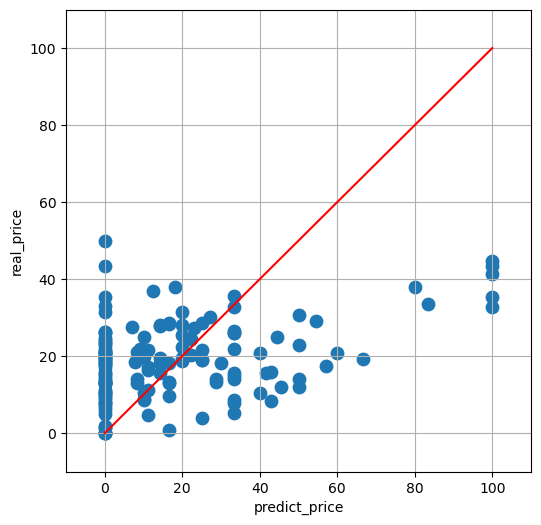

In [16]:
plt.figure(figsize = (6,6))
plt.scatter(y_test,y_pred,s = 80)
plt.grid()
plt.ylabel('real_price')
plt.xlabel('predict_price')
plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.plot([0,100],[0,100],c = 'r')
plt.show()

### 변수 간의 상관관계를 히트맵으로 시각화 및 탐색

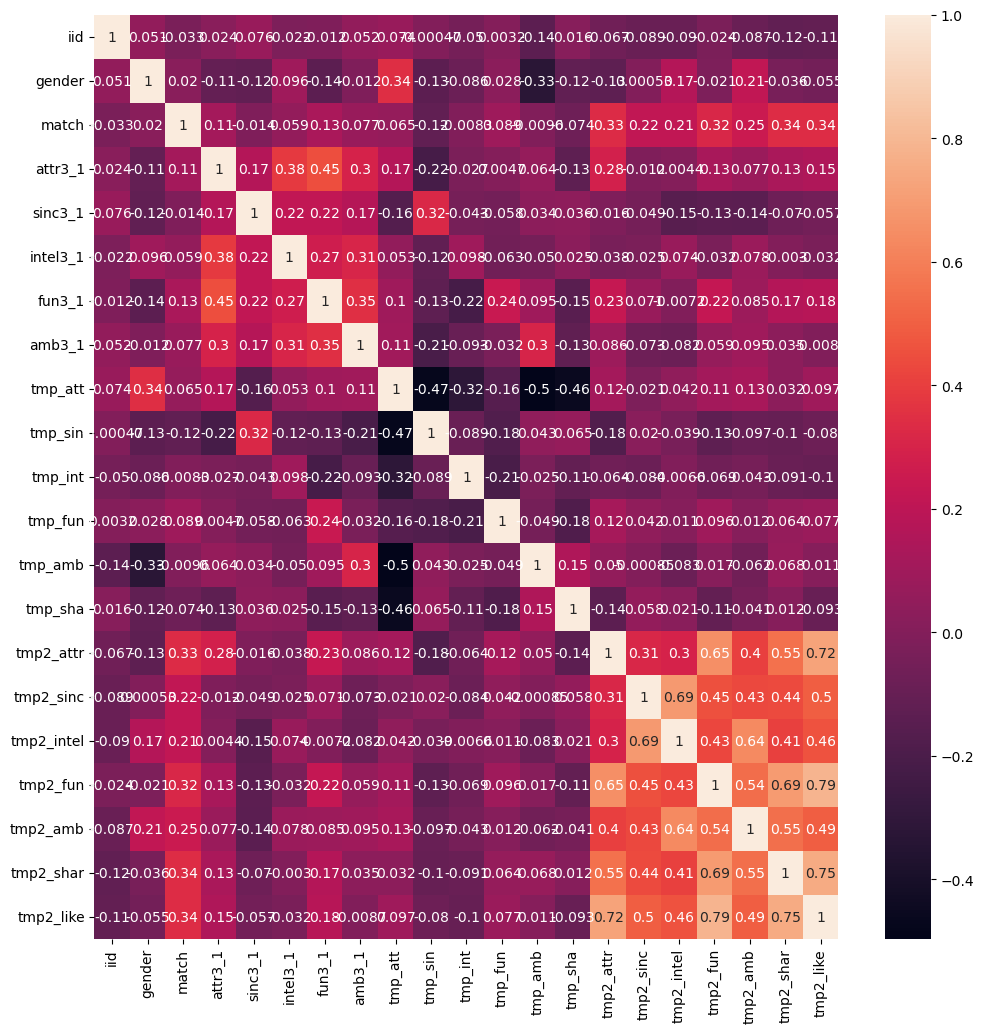

In [17]:
# 상관계수를 구하여 저장
corr_df = train.corr()
corr_df.corr()

# 상관계수를 히트맵으로 시각화
import seaborn as sns
plt.figure(figsize = (12,12))
sns.heatmap(corr_df, annot=True);

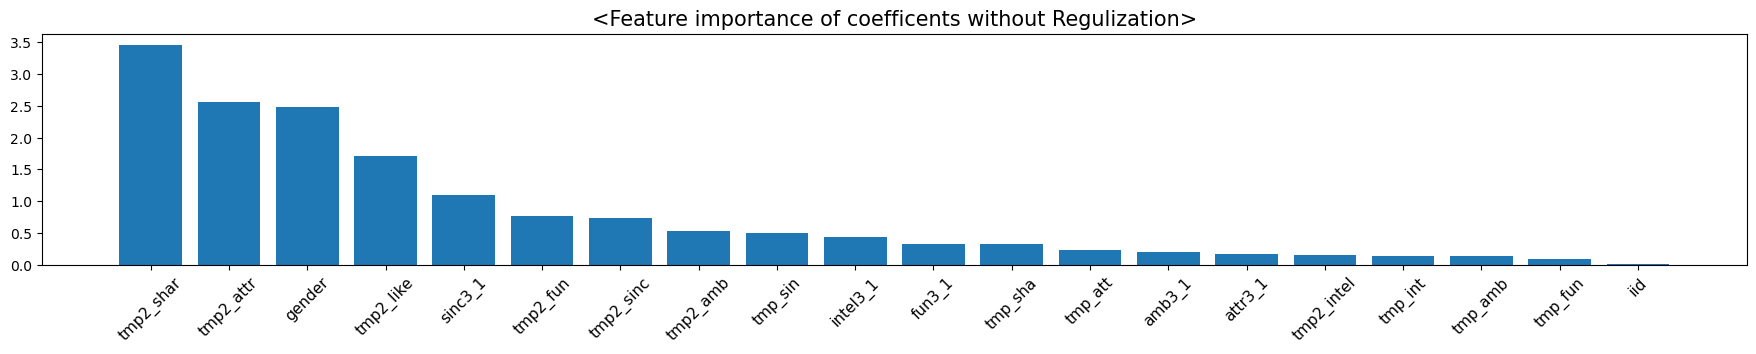

In [18]:
coef = coef.sort_values(ascending=False)
coef = np.abs(coef).sort_values(ascending=False)
# print('======')
# 시각화
plt.figure(figsize=(22,3))
plt.title('<Feature importance of coefficents without Regulization>', fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);

## train4.csv를 사용한 모델

In [19]:
# 데이터 csv 불러오기
train = pd.read_csv('../data/train4.csv')

In [20]:
# Unnamed: 0 column제거
train = train.iloc[:,1:]
# 소수점 2자리까지
train.match = round(train.match, 2)

In [21]:
# X(독립변수), Y(종속변수) 분할
X = train.drop('match', axis=1)
y = train['match']
# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 모델 클래스 선택(LinearRegression)

In [22]:
lr = LinearRegression()

### 2.모델 구축 , 학습, 예측 수행

In [23]:
#  numpy 출력 옵션을 소수점 3자리로 고정하겠다는 설정값.
np.set_printoptions(precision =3 , suppress = True)

In [24]:
#학습 수행
lr.fit(X_train,y_train)
print(lr.intercept_)
lr.coef_

-81.50238766613323


array([ -0.012,   3.128,   1.198,   1.435,   1.143,  -0.334,   0.686,
        -0.493,  -0.798,  -0.564,  -0.621,  -0.852,  -0.872,   0.279,
         0.799,   0.75 ,   2.047,   0.494,   5.986,  -0.252,   4.606,
        -0.222, -10.543,  -0.623,   0.684,   1.997,   0.777,   1.353,
         2.709,   2.418,   1.19 ,   0.445,   1.287,  -0.329,  -0.443,
        -0.218,  -1.202,  -1.303,  -0.95 ,  -1.903,  -1.829,  -1.42 ,
        -0.499,  -0.622,   5.293,   4.07 ,  -6.23 ,   1.004])

### 3.모델 평가

In [25]:
# 모듈 점수 측정
def evaluate_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'mse- {mse:.3f}')
    print(f'rmse- {rmse:.3f}')
    print(f'r2- {r2:.3f}')
    
    return

In [26]:
# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = lr.predict(X_test)
y_pred[y_pred < 0] = 0.
# 평가 지표 계산
evaluate_score(y_test, y_pred)

mse- 540.414
rmse- 23.247
r2- -0.164


In [27]:
y_pred

array([  0.258,   5.695,  22.556,  18.081,   6.894,  26.366,   7.289,
        32.502,  11.397,  30.754,   5.536,  17.212,   8.122,  24.537,
        11.271,  18.182,   7.133,   0.   ,  20.055,   0.   ,   0.   ,
         2.054,  15.125,  17.773,  20.72 ,   2.58 ,  15.817,  25.079,
        14.712,  26.054,  41.169,  29.963,  30.264,  22.805,  13.347,
         3.861,  33.829,  17.658,   0.   ,   0.   ,  15.656,  21.003,
        11.683,   0.   ,  20.066,   0.   ,   3.914,   0.   ,   5.445,
        51.133,   2.53 ,   4.713,   4.446,  67.613,  11.026,  26.104,
         0.   ,  20.356,   0.517,  43.968,  37.193, 123.02 ,  39.556,
         3.976,  16.163,   0.   ,  46.107,  18.542,   0.   ,  32.014,
        17.369,  32.23 ,  15.522,  39.697,  19.332,  15.755,  37.178,
        25.201,  24.721,   8.505,   2.726,   0.5  ,   6.146,   0.   ,
        22.459,  43.299,  10.929,  19.778,  20.846,  12.474,  12.675,
        58.582,   1.698,  20.101,  16.69 ,   0.   ,  33.148,   0.   ,
        12.227,  30.

### 표준화 스케일링을 사용하여 경사하강법 모델링 

In [28]:
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

X_train_scaled = (X_train - train_mean) / train_std
X_test_scaled = (X_test - train_mean) / train_std

# 모델 객체 생성
reg = SGDRegressor(max_iter=100000000, eta0=0.0001, learning_rate='invscaling', loss= 'squared_error', random_state=42)

reg.fit(X_train_scaled, y_train)

# 계수 확인
print(reg.coef_, reg.intercept_)

# 평가 지표
y_pred = reg.predict(X_test_scaled)
y_pred[y_pred < 0] = 0.
evaluate_score(y_test, y_pred)

[-0.393  1.095  1.44   1.951  1.068 -0.418  1.193  1.465 -1.319  0.456
  0.188 -1.354 -1.108  1.283  0.947  0.497  1.888  0.96   5.391  1.271
  0.196 -0.05  -2.236 -2.331  1.165  1.64  -3.086 -1.318  1.188  2.322
 -1.193  2.67   2.14  -0.434 -0.724 -1.137 -2.636  0.126  1.462 -1.189
 -0.8   -1.429  1.071 -1.121  1.435  2.71  -2.886  0.44 ] [17.944]
mse- 442.877
rmse- 21.045
r2- 0.046


### 4.수정된 결정 계수 확인(Ajusted-R2)

In [29]:
#데이터의 크기
n = len(X_train)

#독립변수의 갯수
k = len(X_train.columns)
# 수정된 결정 계수
r2 = r2_score(y_test,y_pred)
adj_r2 = 1- ((1-r2)* (n-1)/(n-k-1))
print('Adjusted R2 : {:.5f}'.format(adj_r2))

Adjusted R2 : -0.10503


### 5.회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [30]:
# 회귀 계수 확인: 각각의 독립변수의 설명력 확인

# 회귀 계수와 절편 값 확인

coef = pd.Series(lr.coef_)
coef.sort_values(ascending = False)
print('Y 절편 : {}'.format(lr.intercept_))
print('회귀 계수 : ',coef)

Y 절편 : -81.50238766613323
회귀 계수 :  0     -0.012087
1      3.128499
2      1.198450
3      1.435478
4      1.142630
5     -0.333872
6      0.685596
7     -0.493079
8     -0.797750
9     -0.563803
10    -0.621075
11    -0.852297
12    -0.871618
13     0.279164
14     0.799436
15     0.749659
16     2.046831
17     0.493762
18     5.986135
19    -0.252123
20     4.605717
21    -0.221660
22   -10.543166
23    -0.623215
24     0.683840
25     1.996876
26     0.776828
27     1.353322
28     2.709196
29     2.418170
30     1.189694
31     0.445203
32     1.286859
33    -0.329361
34    -0.442573
35    -0.218094
36    -1.202070
37    -1.303041
38    -0.949846
39    -1.902803
40    -1.829250
41    -1.419604
42    -0.498750
43    -0.621610
44     5.292909
45     4.070176
46    -6.229801
47     1.003940
dtype: float64


### 회귀 계수를 피처와 연결하고 정렬

In [31]:
# 회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
#회귀 계수값을 기준으로 내림차순으로 정렬
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦
coef = pd.Series(data = np.round(lr.coef_,3),index = X.columns)
print('y = '+ str(lr.intercept_)+ ' + ')
for i,c in zip(coef.index, coef.values):
    print('(' + str(c)+ ')*' + str(i))

y = -81.50238766613323 + 
(-0.012)*iid
(3.128)*gender
(1.198)*attr3_1
(1.435)*sinc3_1
(1.143)*intel3_1
(-0.334)*fun3_1
(0.686)*amb3_1
(-0.493)*tmp_att
(-0.798)*tmp_sin
(-0.564)*tmp_int
(-0.621)*tmp_fun
(-0.852)*tmp_amb
(-0.872)*tmp_sha
(0.279)*tmp2_attr
(0.799)*tmp2_sinc
(0.75)*tmp2_intel
(2.047)*tmp2_fun
(0.494)*tmp2_amb
(5.986)*tmp2_shar
(-0.252)*tmp2_like
(4.606)*condtn
(-0.222)*round
(-10.543)*int_corr
(-0.623)*age_o
(0.684)*age
(1.997)*attr1_1
(0.777)*sinc1_1
(1.353)*intel1_1
(2.709)*fun1_1
(2.418)*amb1_1
(1.19)*shar1_1
(0.445)*attr4_1
(1.287)*sinc4_1
(-0.329)*intel4_1
(-0.443)*fun4_1
(-0.218)*amb4_1
(-1.202)*shar4_1
(-1.303)*attr2_1
(-0.95)*sinc2_1
(-1.903)*intel2_1
(-1.829)*fun2_1
(-1.42)*amb2_1
(-0.499)*shar2_1
(-0.622)*attr5_1
(5.293)*sinc5_1
(4.07)*intel5_1
(-6.23)*fun5_1
(1.004)*amb5_1


In [32]:
coef = pd.Series(coef, index=X_train.columns)
coef

iid           -0.012
gender         3.128
attr3_1        1.198
sinc3_1        1.435
intel3_1       1.143
fun3_1        -0.334
amb3_1         0.686
tmp_att       -0.493
tmp_sin       -0.798
tmp_int       -0.564
tmp_fun       -0.621
tmp_amb       -0.852
tmp_sha       -0.872
tmp2_attr      0.279
tmp2_sinc      0.799
tmp2_intel     0.750
tmp2_fun       2.047
tmp2_amb       0.494
tmp2_shar      5.986
tmp2_like     -0.252
condtn         4.606
round         -0.222
int_corr     -10.543
age_o         -0.623
age            0.684
attr1_1        1.997
sinc1_1        0.777
intel1_1       1.353
fun1_1         2.709
amb1_1         2.418
shar1_1        1.190
attr4_1        0.445
sinc4_1        1.287
intel4_1      -0.329
fun4_1        -0.443
amb4_1        -0.218
shar4_1       -1.202
attr2_1       -1.303
sinc2_1       -0.950
intel2_1      -1.903
fun2_1        -1.829
amb2_1        -1.420
shar2_1       -0.499
attr5_1       -0.622
sinc5_1        5.293
intel5_1       4.070
fun5_1        -6.230
amb5_1       

### 7.독립변수가 여러 개일 때 모델의 성능을 시각화하려면 실제값과 예측값의 분포 차이를 그린다.
- 실제값과 예측값이 같을수록 x,y가 같은 곳을 찍어서 y = x 그래프를 그리게 될 것이다.

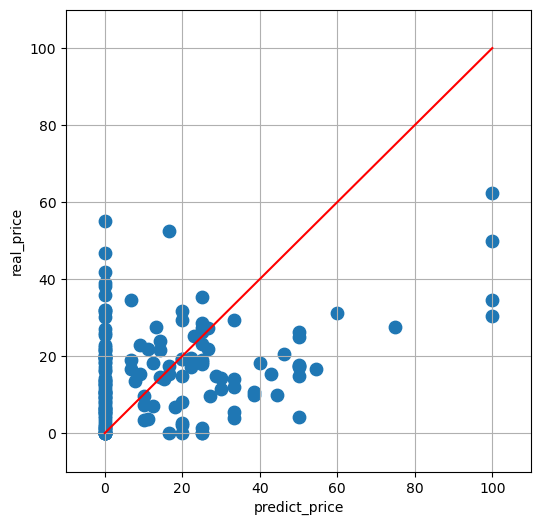

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,6))
plt.scatter(y_test,y_pred,s = 80)
plt.grid()
plt.ylabel('real_price')
plt.xlabel('predict_price')
plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.plot([0,100],[0,100],c = 'r')
plt.show()

### 변수 간의 상관관계를 히트맵으로 시각화 및 탐색

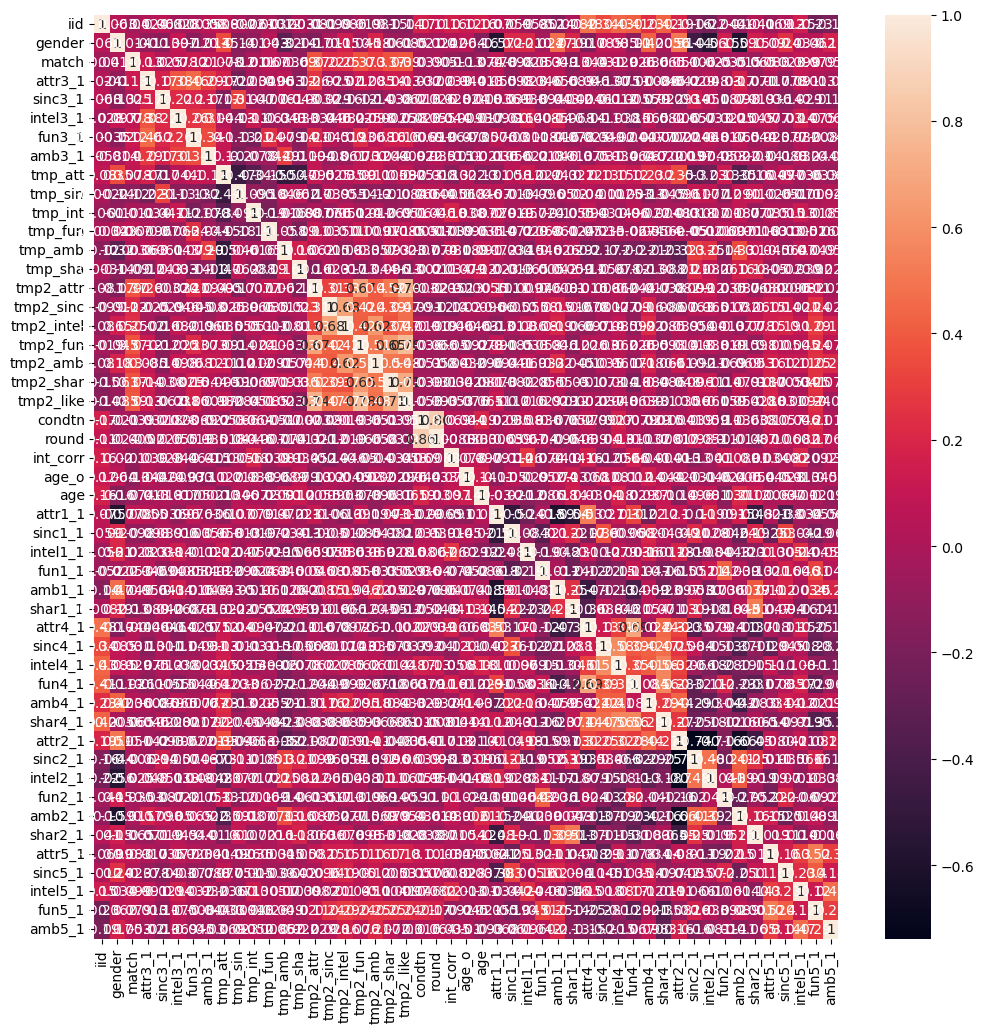

In [34]:

# 상관계수를 구하여 저장
corr_df = train.corr()
corr_df.corr()

# 상관계수를 히트맵으로 시각화
import seaborn as sns
plt.figure(figsize = (12,12))
sns.heatmap(corr_df, annot=True);

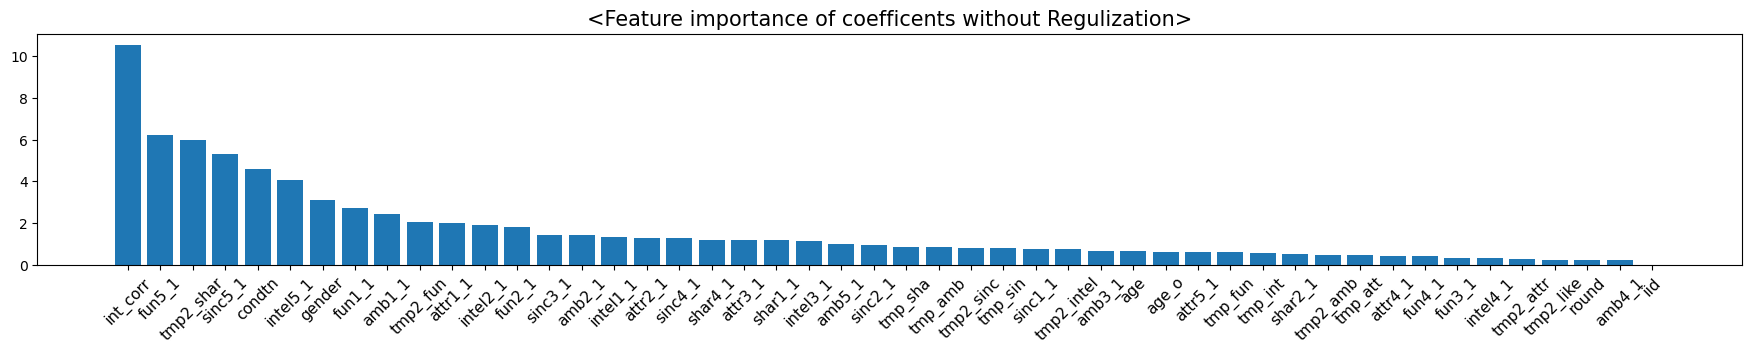

In [35]:
coef = coef.sort_values(ascending=False)
coef = np.abs(coef).sort_values(ascending=False)
# print('======')
# 시각화
plt.figure(figsize=(22,3))
plt.title('<Feature importance of coefficents without Regulization>', fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);